<b>a. Compute the number of distinct authors, publication venues, publications, and citations/references</b>

In [1]:
with open("Desktop\AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    count = 0
    author = set()
    venues = set()
    publications = set()
    citations = set()
    index = ""
    for row in apfile:
        if row.startswith("#@"):            
            for column in row[3:].split(";"):
                 author.add(column.strip())
        elif row.startswith("#c"):
            venues.add(row)
        elif row.startswith("#%"):
            citations.add(index+row)
        elif row.startswith("#index"):
            index = row[7:]
            publications.add(row)
    # The total number contain the null author value as well!            
    print("Number of Authors" , len(author))
    print("Number of Venues" , len(venues))
    print("Number of References" , len(citations))
    print("Number of Publications" , len(publications))

Number of Authors 1478734
Number of Venues 255686
Number of References 7250326
Number of Publications 1976815


<b>b. Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference \Principles and Practice of Knowledge Discovery in Databases" what do you notice?</b>

In [2]:
venue_set = set()

with open("Desktop\AP_train.txt",'r', newline='', encoding="utf8") as apfile:       
    index = ""
    venue = ""
    for row in apfile:
        if row.startswith("#c") and "Principles and Practice of Knowledge Discovery in Databases" in row:
            venue_set.add(row[3:])

print("Venues lists are ")
for venue in venue_set:            
    print(venue)

Venues lists are 
Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)

PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)



<b>c. For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis).

In [3]:
author_to_publications = {}

# Considering each Citation as one
with open("Desktop\AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    for row in apfile:
        if row.startswith("#@"):            
            for column in row[3:].split(";"):
                if author_to_publications.get(column.strip()) == None:
                    author_to_publications[column.strip()] = 1
                else:
                    author_to_publications[column.strip()]  += 1
                    
authors = author_to_publications.keys()

publications = list(author_to_publications.values())
print("Done creating dictionary {author -> number of publications}")

Done creating dictionary {author -> number of publications}


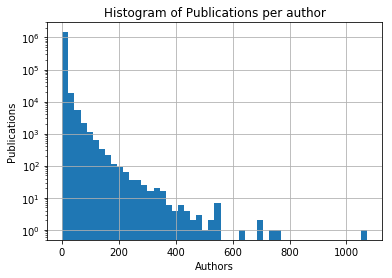

In [4]:
import matplotlib.pyplot as plt

null_index = list(authors).index("")
# del authors[null_index]
del publications[null_index]

plt.xlabel('Authors')
plt.ylabel('Publications')
plt.title('Histogram of Publications per author')
plt.grid(True)

plt.hist(publications,bins=50,log=True)
plt.show()

<b>d. Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the dierence between the two values based on the standard deviation and the 1st and 3rd quartiles.</b>

In [5]:
import numpy as np

print("Mean of publications per author = " , np.mean(np.array(publications)))

Mean of publications per author =  3.29178560295


In [6]:
print("First Quartile is as follows : " , np.percentile(np.array(publications), 25))
print("Third Quartile is as follows : " , np.percentile(np.array(publications), 75))

First Quartile is as follows :  1.0
Third Quartile is as follows :  2.0


In [7]:
print("Median of publications per author = " , np.median(np.array(publications)))

Median of publications per author =  1.0


In [8]:
print("Standard Deviation of publications per author = " , np.std(np.array(publications)))

Standard Deviation of publications per author =  8.87188969104


In [9]:
print("Min in publications per author = " , np.min(np.array(publications)))
print("Max in publications per author = " , np.max(np.array(publications)))

Min in publications per author =  1
Max in publications per author =  1071


<b>e. Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

In [12]:
venue_to_publications = {}

# Considering each occurence as one publication
with open("Desktop\AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    for row in apfile:
        if row.startswith("#c"):                        
            if venue_to_publications.get(row[3:]) == None:
                venue_to_publications[row[3:]] = 1
            else:
                venue_to_publications[row[3:]]  += 1
                    
venues = list(venue_to_publications.keys())
publications = list(venue_to_publications.values())

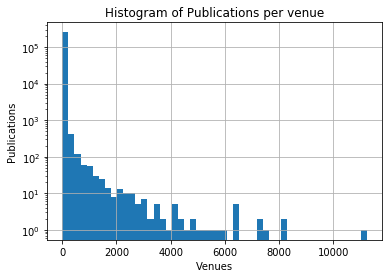

In [15]:
plt.xlabel('Venues')
plt.ylabel('Publications')
plt.title('Histogram of Publications per venue')
plt.grid(True)

plt.hist(publications,bins = 50, log=True)
plt.show()

In [16]:
import numpy as np

publications = np.array(publications)
max_venues = []
print("Mean of publications per venue = " , np.mean(publications))
print("Median of publications per venue = " , np.median(publications))
print("First Quartile is as follows : " , np.percentile(publications, 25))
print("Third Quartile is as follows : " , np.percentile(publications, 75))
print("Standard Deviation of publications per venue " , np.std(publications))
print("Max number of publications per venue = " , np.max(publications))
print("Standard Deviation of publications per venue = " , np.std(publications))
print("Max publication at Venue = " , venues[list(venue_to_publications.values()).index(max(list(venue_to_publications.values())))])

Mean of publications per venue =  7.7314166595
Median of publications per venue =  1.0
First Quartile is as follows :  1.0
Third Quartile is as follows :  1.0
Standard Deviation of publications per venue  83.3810561036
Max number of publications per venue =  11227
Standard Deviation of publications per venue =  83.3810561036
Max publication at Venue =  IEEE Transactions on Information Theory



<b>f. Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

In [4]:
ref = {}
cite = {}
cite_count_venue = {}
venue_publicationName = {}

with open("Desktop/AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    index = 0
    venue = ""
    for row in apfile:        
        if row.startswith("#index"):                        
            index = int(row[7:])
        elif row.startswith("#c"):                        
            venue = row[3:]
            if venue_publicationName.get(index) == None:
                venue_publicationName[index] = venue
        elif row.startswith("#%"):
            if ref.get(index) == None:
                ref[index] = 1
            else:
                ref[index]  += 1
                
            if cite.get(int(row[3:])) == None:
                cite[int(row[3:])] = 1
            else:
                cite[int(row[3:])]  += 1                            
            
            cite_venue = venue_publicationName.get(int(row[3:]))
            if cite_count_venue.get(cite_venue) == None:
                cite_count_venue[cite_venue] = 1
            else:
                cite_count_venue[cite_venue] += 1
                    
print("Total references", len(ref))
print("Total cites", len(cite))

Total references 797454
Total cites 871089


In [5]:
print("Publication index with max References = " , list(ref.keys())[list(ref.values()).index(max(list(ref.values())))] , "with value = ",max(list(ref.values())))
print("Publication index with max Citations = " , list(cite.keys())[list(cite.values()).index(max(list(cite.values())))] , "with value = ",max(list(cite.values())))

Publication index with max References =  719353 with value =  772
Publication index with max Citations =  408396 with value =  7753


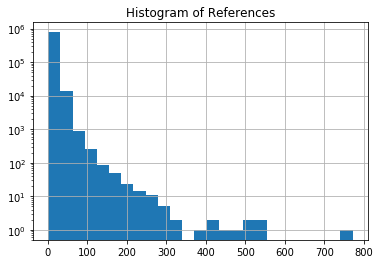

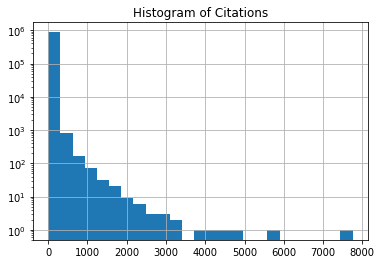

In [7]:
import matplotlib.pyplot as plt
plt.title('Histogram of References')
plt.grid(True)

plt.hist(list(ref.values()),bins=25,log=True)
plt.show()


plt.title('Histogram of Citations')
plt.grid(True)

plt.hist(list(cite.values()),bins=25,log=True)
plt.show()

<b>g. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

In [13]:
venue_impact = {}

for venue in cite_count_venue.keys():   
    venue_impact[venue] = 0    
    if venue != 'None' and venue_to_publications.get(venue) != None :
        venue_impact[venue] = cite_count_venue[venue]/venue_to_publications[venue]

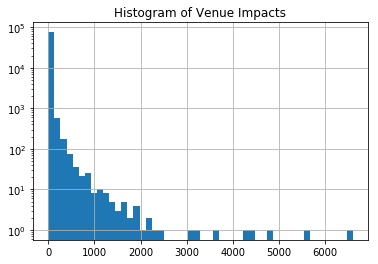

In [14]:
import matplotlib.pyplot as plt

plt.title('Histogram of Venue Impacts')
plt.grid(True)

plt.hist(list(venue_impact.values()),bins=50,log=True)
plt.show()

In [15]:
max_index = list(venue_impact.values()).index(max(list(venue_impact.values())))
print("Venue with max impact = " , list(venue_impact.keys())[max_index])

Venue with max impact =  Computers and Intractability: A Guide to the Theory of NP-Completeness



<b>h. What is the venue with the highest apparent impact factor? Do you believe this number?

In [16]:
max_index = list(venue_impact.values()).index(max(list(venue_impact.values())))
print("Venue with max impact = " , list(venue_impact.keys())[max_index])

Venue with max impact =  Computers and Intractability: A Guide to the Theory of NP-Completeness



The impact factor is for any publication venue is directly related to the number of citations of all the papers published in the publication v/s the number of papers published at that venue. 
However, from b, we know that the name of certain venues have been written differently in different data records. 
Thus, we know that the number might as well be not accurate. 
Thus the impact factor above seems unbelivable.

<b>i. Now repeat the calculation from (1-g), but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

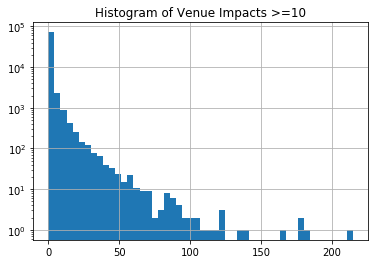

In [18]:
venue_impact = {}

for venue in cite_count_venue.keys():   
    venue_impact[venue] = 0    
    if venue != 'None' and venue_to_publications.get(venue) != None and venue_to_publications[venue] >=10 :
        venue_impact[venue] = cite_count_venue[venue]/venue_to_publications[venue]        

import matplotlib.pyplot as plt

plt.title('Histogram of Venue Impacts >=10')
plt.grid(True)

plt.hist(list(venue_impact.values()),bins=50,log=True)
plt.show()

In [22]:
import numpy as np

max_index = list(venue_impact.values()).index(max(list(venue_impact.values())))
print("Venue with max impact = " , list(venue_impact.keys())[max_index].strip() , ": with value = " , list(venue_impact.values())[max_index])
print("Median of citations" , np.median(np.array(list(cite_count_venue.values()))[0]))

Venue with max impact =  Proceedings of the 2001 conference on Applications, technologies, architectures, and protocols for computer communications : with value =  214.6086956521739
Median of citations 1075854.0


<b>i) Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

In [25]:
year_publications = {}
year_avg = {}

with open("Desktop/AP_train.txt",'r', newline='', encoding="utf8") as apfile:    
    index = 0
    year = 0
    for row in apfile:        
        if row.startswith("#index"):                        
            index = int(row[7:])
        elif row.startswith("#t") and len(row)==8:
            year = int(row[3:])            
            if year_publications.get(year) == None:
                year_publications[year] = {"publications":0,"cites":0,"refs":0}
                year_publications[year]["publications"] = 1                
                if cite.get(index) != None:
                    year_publications[year]["cites"] = cite.get(index)
                if ref.get(index) != None:
                    year_publications[year]["refs"] = ref.get(index)
            else:
                year_publications[year]["publications"] += 1
                if cite.get(index) != None:
                    year_publications[year]["cites"] += cite.get(index)
                if ref.get(index) != None:
                    year_publications[year]["refs"] += ref.get(index)

In [26]:

import collections

for year in year_publications.keys():
    year_avg[year] = {}
    year_avg[year]["cites"] = year_publications[year]["cites"]/ year_publications[year]["publications"]
    year_avg[year]["refs"] = year_publications[year]["refs"]/ year_publications[year]["publications"]
    #print("Averages for year" ,year, year_avg[year])

year_avg = collections.OrderedDict(sorted(year_avg.items()))

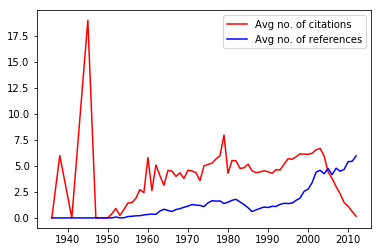

In [28]:
x = list(year_avg.keys())
y1 = list([year_avg[year]["cites"] for year in x])
y2 = list([year_avg[year]["refs"] for year in x])

fig, ax = plt.subplots()
ax.plot(x, y1, 'r', label='Avg no. of citations')
ax.plot(x, y2, 'b', label='Avg no. of references')

legend = ax.legend(loc='upper right')

plt.show()